<a href="https://colab.research.google.com/github/aaryyya/MLDLAlgorithmsTYITAssignments/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# prompt: write me a code for a linear and logistic regression using this https://www.kaggle.com/datasets/luvharishkhati/heart-disease-patients-details dataset


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace with your actual file path if different)
try:
  df = pd.read_csv('/content/heart_disease.csv')
except FileNotFoundError:
  print("Error: 'heart_disease_patients_details.csv' not found. Please upload the file to your Colab environment.")
  exit()

# Handle missing values (if any) - Example: fill with mean for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Feature Selection for both models
X = df.drop('result', axis=1)  # Features
y_linear = df['age'] # Target for linear regression (example: predicting age)
y_logistic = df['result'] # Target for logistic regression


# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)


# Split Data
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y_linear, test_size=0.2, random_state=42)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X, y_logistic, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_linear = scaler.fit_transform(X_train_linear)
X_test_linear = scaler.transform(X_test_linear)

X_train_logistic = scaler.fit_transform(X_train_logistic)
X_test_logistic = scaler.transform(X_test_logistic)



# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)
linear_predictions = linear_model.predict(X_test_linear)
linear_mse = mean_squared_error(y_test_linear, linear_predictions)
print(f"Linear Regression Mean Squared Error: {linear_mse}")

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
logistic_model.fit(X_train_logistic, y_train_logistic)
logistic_predictions = logistic_model.predict(X_test_logistic)
logistic_accuracy = accuracy_score(y_test_logistic, logistic_predictions)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")

Linear Regression Mean Squared Error: 7.292580812709798e-29
Logistic Regression Accuracy: 0.9074074074074074


<ipython-input-6-67e908b360f7>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-9-d8981b1f29e8>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Linear Regression Mean Squared Error: 0.14877660299287154


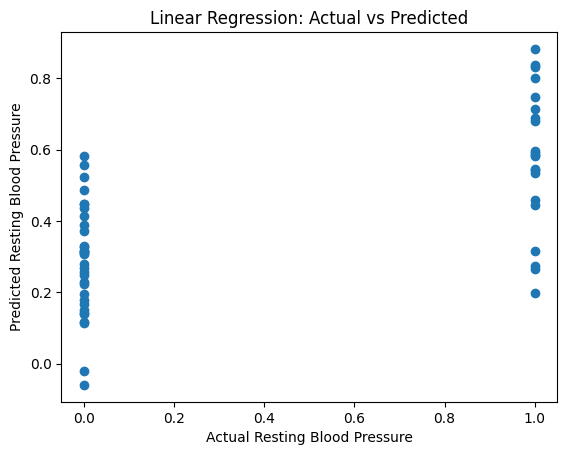

Logistic Regression Accuracy: 0.8333333333333334


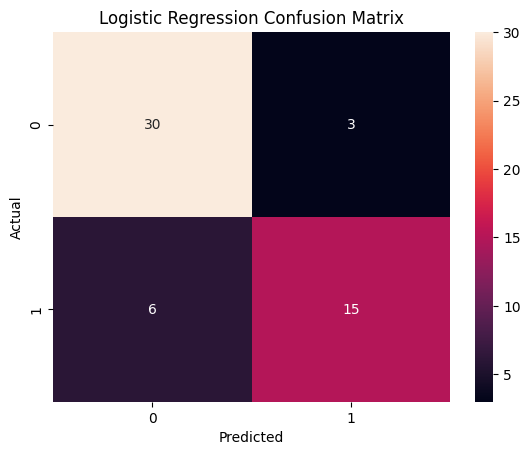

In [9]:
# prompt: age
# sex
# chest
# resting_blood_pressure
# serum_cholestoral
# fasting_blood_sugar
# resting_electrocardiographic_results
# maximum_heart_rate_achieved
# exercise_induced_angina
# oldpeak
# slope
# number_of_major_vessels
# thal
# result for these columns generate a code for logistic and linear regression in python also use some visulization and use 2 features atleast

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
try:
    df = pd.read_csv('/content/heart_disease.csv')
except FileNotFoundError:
    print("Error: 'heart_disease.csv' not found. Please upload the file to your Colab environment.")
    exit()

# Handle missing values (if any) - Example: fill with mean for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Feature selection
features = ['age', 'sex', 'maximum_heart_rate_achieved']  # Example features; you can change these
X = df[features]
y_linear = df['result']  # Example target for linear regression
y_logistic = df['result']  # Target for logistic regression

# Convert categorical features to numerical using one-hot encoding if needed
X = pd.get_dummies(X, drop_first=True)


# Split data
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y_linear, test_size=0.2, random_state=42)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X, y_logistic, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_linear = scaler.fit_transform(X_train_linear)
X_test_linear = scaler.transform(X_test_linear)
X_train_logistic = scaler.fit_transform(X_train_logistic)
X_test_logistic = scaler.transform(X_test_logistic)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)
linear_predictions = linear_model.predict(X_test_linear)
linear_mse = mean_squared_error(y_test_linear, linear_predictions)
print(f"Linear Regression Mean Squared Error: {linear_mse}")

# Visualization for Linear Regression
plt.scatter(y_test_linear, linear_predictions)
plt.xlabel("Actual Resting Blood Pressure")
plt.ylabel("Predicted Resting Blood Pressure")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_logistic, y_train_logistic)
logistic_predictions = logistic_model.predict(X_test_logistic)
logistic_accuracy = accuracy_score(y_test_logistic, logistic_predictions)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")

# Visualization for Logistic Regression (Confusion Matrix)
cm = confusion_matrix(y_test_logistic, logistic_predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [ ]:
# prompt: is linear regression given by u right?

# Existing code is already performing linear regression.
# The code trains a linear regression model using 'age' as the target variable.
# It calculates the mean squared error to evaluate the model's performance.

# If you want to use a different target variable for linear regression,
# change the line: y_linear = df['age']
# Example: to predict 'resting_blood_pressure':
# y_linear = df['resting_blood_pressure']

# The code also trains a logistic regression model with 'result' as the target variable.
# The accuracy is used to evaluate its performance.

# No further code is needed to perform linear regression, as it is already done.
# If you want to experiment with different features or target variables,
# modify the 'features' list and the 'y_linear' variable accordingly.
